# Working Title: Analysis of the Atlas of Rural and Small Town America dataset

## Goals:

### Scientific Analysis and Results
- Cites Sources
    - https://catalog.data.gov/dataset/atlas-of-rural-and-small-town-america
    - https://www.ers.usda.gov/data-products/atlas-of-rural-and-small-town-america/download-the-data/
    - https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv
    
 - Hypothesis driven
### Demonstration of Skills

#### Techinical Skills
- Python
- Jupyter notebook 
    - markdown
- data aquisition
    - find and load data
- descriptive data analysis
    - parametric vs non-parametric tests
    - numpy/ pandas
- data visualization
    - matplotlib
    - seaborn
- interpreting results

Soft Skills
- scientific communication

## Introduction

### Why wildfire? 

I have driven through the smoldering remains of a wildfire just nearly extinguished. At least, my professer drove, her SUV rolling through the red night at half speed. I mostly stared out the window awestruck. I had never been this close to a wildfire- had only ever seen the charred sticks left behind by grown trees. That was cool, ashy, day. This was... not that. The sides of the road glowed and flickered, too bright for the country evening. It was strange and even though I knew how 



### Data Sources


    - https://catalog.data.gov/dataset/atlas-of-rural-and-small-town-america
    - https://www.ers.usda.gov/data-products/atlas-of-rural-and-small-town-america/download-the-data/
    - https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv


### Hypotheses

Wildfires are devastating natural disasters that not only dirupt the lives and economies of the communities where they occur, but may also have significant post-fire effects that prevent a return to normalacy (which itself has cascading effects). Rural californian counties that experience higher wildfire occurrence may experience decreases in population and  employment rates following the event. Specifically, I test the hypotheses that
1) 
2) 
3)

## Analysis

### Prepare data

#### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import shapiro

#### Import datasets

In [2]:
# Import relevant datasets
jobs = pd.read_csv('jobs.csv', header = 0) # 
people = pd.read_csv('people.csv')
fires = pd.read_csv('California_Fire_Incidents.csv')

#### Prepare population estimates table

In [3]:
# Slice population data from people table
population = people[['State', 'County', 'TotalPopEst2010', 'TotalPopEst2011', 'TotalPopEst2012', 'TotalPopEst2013', 'TotalPopEst2014', 'TotalPopEst2015', 'TotalPopEst2016', 'TotalPopEst2017', 'TotalPopEst2018', 'TotalPopEst2019']]

# Select only counties in Clifornia. 
population = population[ population['State'] == 'CA']

# Remove State column and make County column new index
population = population.drop('State', 1)
population = population.set_index('County')

# Rename index and transpose so rows are years while columns are county names 
population.rename(index={'TotalPopEst2010': '2010',  'TotalPopEst2011': '2011', 'TotalPopEst2012': '2012', 'TotalPopEst2013': '2013', 'TotalPopEst2014': '2014', 'TotalPopEst2015': '2015', 'TotalPopEst2016': '2016', 'TotalPopEst2017': '2017', 'TotalPopEst2018': '2018', 'TotalPopEst2019': '2019'}, inplace=True)
population = population.transpose()
population

population.rename(index={'TotalPopEst2010': '2010', 'TotalPopEst2011': '2011', 'TotalPopEst2012': '2012', 'TotalPopEst2013': '2013', 'TotalPopEst2014': '2014', 'TotalPopEst2015': '2015', 'TotalPopEst2016': '2016', 'TotalPopEst2017': '2017', 'TotalPopEst2018': '2018', 'TotalPopEst2019': '2019'}, inplace=True)
population

# Quick visualization of population trends for CA and each county
# population.plot(subplots = True, layout = (10,6), figsize=(30, 12));

County,California,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
2010,37319502,1512986,1161,37886,219949,45468,21437,1052540,28566,181136,...,484755,515145,94751,63559,13755,442969,55190,825097,201073,72348
2011,37638369,1530915,1093,37543,219975,45160,21323,1065440,28443,180936,...,487421,517560,94482,63331,13685,446784,54830,830099,201954,72489
2012,37948800,1553764,1110,37104,220869,44815,21284,1077548,28190,180575,...,489993,520424,94189,63212,13489,449779,54221,833516,204576,72774
2013,38260787,1579593,1128,36620,221641,44655,21250,1093401,27816,181481,...,494073,523451,94507,62875,13427,452460,53997,838136,206292,73090
2014,38596972,1607792,1080,36726,223516,44671,21176,1108876,27175,183108,...,498560,528015,94778,62801,13128,455138,53851,842297,208398,73533
2015,38918045,1634538,1077,37031,224631,44965,21231,1124405,27190,184569,...,500863,533211,95282,63158,13094,457161,53615,845802,212037,74045
2016,39167117,1650950,1047,37429,226231,45322,21496,1137268,27382,185976,...,502547,539255,95742,63453,12828,459235,53770,847323,215627,74952
2017,39358497,1660196,1111,38529,228696,45681,21579,1145535,27351,188679,...,502469,544717,96204,63847,12726,462308,53976,849044,218477,76578
2018,39461588,1666756,1089,39405,230339,45698,21418,1150519,27740,190746,...,498643,548126,96348,64018,12567,464589,54387,848142,220118,77557
2019,39512223,1671329,1129,39752,219186,45905,21547,1153526,27812,192843,...,494336,550660,96971,65084,12285,466195,54478,846006,220500,78668


#### Prepare employment statistic tables

In [4]:
# Select only counties in California.
jobs = jobs[jobs['State'] == 'CA']

In [5]:
# Prepare tables for civilian labor force counts
# Slice employment data from jobs table.
nlabor = jobs[['State', 'County', 'NumCivLaborforce2007', 'NumCivLaborForce2008', 'NumCivLaborForce2009', 'NumCivLaborForce2010', 'NumCivLaborForce2011', 'NumCivLaborForce2012', 'NumCivLaborforce2013', 'NumCivLaborforce2014', 'NumCivLaborforce2015', 'NumCivLaborforce2016', 'NumCivLaborforce2017', 'NumCivLaborforce2018', 'NumCivLaborforce2019', 'NumCivLaborforce2020']]

# Remove State column and make County column new index
nlabor = nlabor.drop('State', 1)
nlabor = nlabor.set_index('County')

# Transpose so columns are names while rows are years                   
nlabor = nlabor.transpose()

# Rename indexes to years
nlabor.rename(index={'NumCivLaborforce2007': '2007', 'NumCivLaborForce2008': '2008', 'NumCivLaborForce2009': '2009', 'NumCivLaborForce2010': '2010', 'NumCivLaborForce2011': '2011', 'NumCivLaborForce2012': '2012', 'NumCivLaborforce2013': '2013', 'NumCivLaborforce2014': '2014', 'NumCivLaborforce2015': '2015', 'NumCivLaborforce2016': '2016', 'NumCivLaborforce2017': '2017', 'NumCivLaborforce2018': '2018', 'NumCivLaborforce2019': '2019', 'NumCivLaborforce2020': '2020'}, inplace=True)
#nlabor

In [6]:
# Repeat steps for the rest of the demographic tables

# Prepare table for civilian labor force counts
nemp = jobs[['State', 'County', 'NumEmployed2007', 'NumEmployed2008', 'NumEmployed2009', 'NumEmployed2010', 'NumEmployed2011', 'NumEmployed2012', 'NumEmployed2013', 'NumEmployed2014', 'NumEmployed2015', 'NumEmployed2016', 'NumEmployed2017', 'NumEmployed2018', 'NumEmployed2019', 'NumEmployed2020']] 
nemp = nemp.drop('State', 1)
nemp = nemp.set_index('County')
nemp = nemp.transpose()
nemp.rename(index={'NumEmployed2007': '2007', 'NumEmployed2008': '2008', 'NumEmployed2009': '2009', 'NumEmployed2010': '2010', 'NumEmployed2011': '2011', 'NumEmployed2012': '2012', 'NumEmployed2013': '2013', 'NumEmployed2014': '2014', 'NumEmployed2015': '2015', 'NumEmployed2016': '2016', 'NumEmployed2017': '2017', 'NumEmployed2018': '2018', 'NumEmployed2019': '2019', 'NumEmployed2020': '2020'}, inplace=True)
#nemp

# Prepare table for civilian labor force counts
runemp = jobs[['State', 'County', 'UnempRate2007', 'UnempRate2008', 'UnempRate2009', 'UnempRate2010', 'UnempRate2011', 'UnempRate2012', 'UnempRate2013', 'UnempRate2014', 'UnempRate2015', 'UnempRate2016', 'UnempRate2017', 'UnempRate2018', 'UnempRate2019', 'UnempRate2020']]
runemp = runemp.drop('State', 1)
runemp = runemp.set_index('County')
runemp = runemp.transpose()
runemp.rename(index={'UnempRate2007': '2007', 'UnempRate2008': '2008', 'UnempRate2009': '2009', 'UnempRate2010': '2010', 'UnempRate2011': '2011', 'UnempRate2012': '2012', 'UnempRate2013': '2013', 'UnempRate2014': '2014', 'UnempRate2015': '2015', 'UnempRate2016': '2016', 'UnempRate2017': '2017', 'UnempRate2018': '2018', 'UnempRate2019': '2019', 'UnempRate2020': '2020'}, inplace=True)
#runemp

# Prepare table for civilian labor force counts
nunemp = jobs[['State', 'County', 'NumUnemployed2007', 'NumUnemployed2008', 'NumUnemployed2009', 'NumUnemployed2010', 'NumUnemployed2011', 'NumUnemployed2012', 'NumUnemployed2013', 'NumUnemployed2014', 'NumUnemployed2015', 'NumUnemployed2016', 'NumUnemployed2017', 'NumUnemployed2018', 'NumUnemployed2019', 'NumUnemployed2020']]
nunemp = nunemp.drop('State', 1)
nunemp = nunemp.set_index('County')
nunemp = nunemp.transpose()
nunemp.rename(index={'NumUnemployed2007': '2007', 'NumUnemployed2008': '2008', 'NumUnemployed2009': '2009', 'NumUnemployed2010': '2010', 'NumUnemployed2011': '2011', 'NumUnemployed2012': '2012', 'NumUnemployed2013': '2013', 'NumUnemployed2014': '2014', 'NumUnemployed2015': '2015', 'NumUnemployed2016': '2016', 'NumUnemployed2017': '2017', 'NumUnemployed2018': '2018', 'NumUnemployed2019': '2019', 'NumUnemployed2020': '2020'}, inplace=True)
#nunemp

#### Prepare wildfire dataset

In [7]:
# Drop rows for States of Oregon and Nevada, as well as Mexico
fires = fires[fires['Counties'] != 'State of Oregon'] 
fires = fires[fires['Counties'] != 'State of Nevada']
fires = fires[fires['Counties'] != 'Mexico']
fires = fires[fires['ArchiveYear'] < 2019] # so 2018 fires match next years' data (2019)

# Calculate acres burned per county per year and format
acres_burned = fires.groupby(["Counties", "ArchiveYear"])["AcresBurned"].sum().to_frame(name = 'AcresBurned')

# Reset indexes so dataframe is singly indexed
acres_burned = acres_burned.reset_index()
acres_burned

,Counties,ArchiveYear,AcresBurned
0,Alameda,2013,478.0
1,Alameda,2015,3340.0
2,Alameda,2016,211.0
3,Alameda,2017,537.0
4,Alameda,2018,1288.0
5,Alpine,2015,0.0
6,Alpine,2016,0.0
7,Amador,2013,96.0
8,Amador,2014,4240.0
9,Amador,2015,415.0


#### Associate year-after employment statistics with yearly wildfire data

For each combination of County and Archive year in acres_burned (e.g. Yuba and 2017), 
add the employment metric value for that county and the year after the fire from the employment table in a new column in acres_burned.

In [8]:
# Number of civilians in labor force

# Catch values in list
tmp_labor = [] 

# Iterate over each row in acres_bruned
for index, row in acres_burned.iterrows():
    # Get the year after the fire
    yr = str(row[1] + 1)
    # Get the county
    cnty = str(row[0])
    # Temporary variable holds labor stat from that year/county combo
    tmp = nlabor.loc[yr, cnty]
    # Add temporary variable to list
    tmp_labor.append(tmp)

# Set list as new column in acres burned
acres_burned['nlabor_yaf'] = tmp_labor

In [9]:
## Brandon's comments


# Repeat steps for the rest of the demographic tables

# Number of employed people
tmp_labor = [] 
for index, row in acres_burned.iterrows():
    yr = str(row[1] + 1)
    cnty = str(row[0])
    tmp = nemp.loc[yr, cnty]
    tmp_labor.append(tmp)
acres_burned['nemp_yaf'] = tmp_labor

# Rate of unmeployment
tmp_labor = [] 
for index, row in acres_burned.iterrows():
    yr = str(row[1] + 1)
    cnty = str(row[0])
    tmp = runemp.loc[yr, cnty]
    tmp_labor.append(tmp)
acres_burned['runemp_yaf'] = tmp_labor

# Number of unemployed people
tmp_labor = [] 
for index, row in acres_burned.iterrows():
    yr = str(row[1] + 1)
    cnty = str(row[0])
    tmp = nunemp.loc[yr, cnty]
    tmp_labor.append(tmp)
acres_burned['nunemp_yaf'] = tmp_labor

# Population 
tmp1_pop = []
tmp2_pop = []

for index, row in acres_burned.iterrows():
    yaf = str(row[1] + 1)
    yr = str(row[1])
    cnty = str(row[0])
    tmp1 = population.loc[yaf, cnty]
    tmp1_pop.append(tmp1)
    tmp2 = population.loc[yaf, cnty] - population.loc[yr, cnty]
    tmp2_pop.append(tmp2)
acres_burned['pop_yaf'] = tmp1_pop # Population the year after the fire
acres_burned['deltapop_yaf'] = tmp2_pop # Change in population between the year after the fire and the year of the fire.

acres_burned

,Counties,ArchiveYear,AcresBurned,nlabor_yaf,nemp_yaf,runemp_yaf,nunemp_yaf,pop_yaf,deltapop_yaf
0,Alameda,2013,478.0,806326.0,758819.0,5.9,47507.0,1607792,28199
1,Alameda,2015,3340.0,831827.0,796037.0,4.3,35790.0,1650950,16412
2,Alameda,2016,211.0,838697.0,807652.0,3.7,31045.0,1660196,9246
3,Alameda,2017,537.0,841484.0,815690.0,3.1,25794.0,1666756,6560
4,Alameda,2018,1288.0,841075.0,815889.0,3.0,25186.0,1671329,4573
5,Alpine,2015,0.0,554.0,518.0,6.5,36.0,1047,-30
6,Alpine,2016,0.0,549.0,515.0,6.2,34.0,1111,64
7,Amador,2013,96.0,14321.0,13118.0,8.4,1203.0,36726,106
8,Amador,2014,4240.0,14317.0,13366.0,6.6,951.0,37031,305
9,Amador,2015,415.0,14525.0,13658.0,6.0,867.0,37429,398


Next Steps:
    - test normailty of data
        - Shapiro-WIlkes Tests
        - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
    - correlation between acres burned and employment metrics
        - here, do not consider county

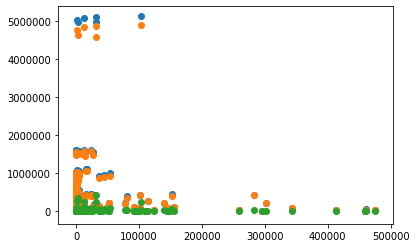

In [24]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['nlabor_yaf'], label='Civilian Labor Force (n)')
plt.scatter(acres_burned['AcresBurned'], acres_burned['nemp_yaf'], label='Employed (n)')
plt.scatter(acres_burned['AcresBurned'], acres_burned['nunemp_yaf'], label='Unemployed (n)')

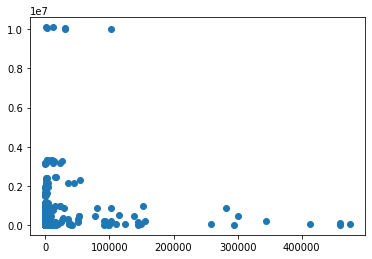

In [25]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['pop_yaf'], label='Population')

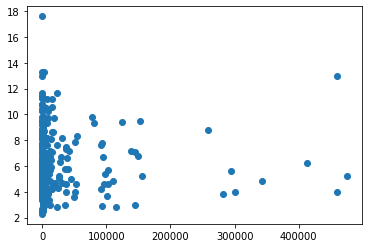

In [26]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['runemp_yaf'], label='Unemployment Rate')

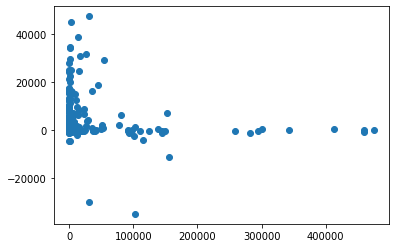

In [27]:
plt.scatter(acres_burned['AcresBurned'], acres_burned['deltapop_yaf'], label='Change in Population')